In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [14]:
# write your code for task 0 here
df = (pd
      .read_csv("../data/adult.csv"
                ).replace('?', np.nan
                          ).dropna()
      )

filtered_salary = np.where(
    (df["salary K$"] <= 50) & (df["salary"] == "<=50K"), df["salary K$"],
    np.where((df["salary K$"] > 50) & (df["salary"] == ">50K"), df["salary K$"], np.nan)
)

# Task 1
Print the count of men and women in the dataset.

In [15]:
# write your code for task 1 here
df['sex'].value_counts()

Male      20380
Female     9782
Name: sex, dtype: int64

# Task 2
Find the average age of men in dataset

In [16]:
# write your code for task 2 here
df[df["sex"] == "Male"]["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [17]:
# write your code for task 3 here
df[df['native-country'] == 'Poland'
   ].shape[0] / df.shape[0] * 100

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [8]:
# write your code for task 4 here
mean_age_high_salary = df[df['salary'] == '>50K']['age'].mean()
std_dev_age_high_salary = df[df['salary'] == '>50K']['age'].std()

# Calculate mean and standard deviation for people earning <= 50K per year
mean_age_low_salary = df[df['salary'] == '<=50K']['age'].mean()
std_dev_age_low_salary = df[df['salary'] == '<=50K']['age'].std()
std_dev_age_high_salary, std_dev_age_low_salary

(10.269632835673852, 13.464631257161633)

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [18]:
# write your code for task 5 here
df[
    ~df["education"]
    .isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'])
    & (df["salary"] == ">50K")
    ]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [19]:
# write your code for task 6 here
df.groupby('education')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [20]:
# write your code for task 7 here
married = df[df["marital-status"].str.startswith("Married")]
non_married = df[~df["marital-status"].str.startswith("Married")]

(married[married["salary"] == "<=50K"]["salary K$"].mean(), married[married["salary"] == ">50K"]["salary K$"].mean(),
 non_married[non_married["salary"] == "<=50K"]["salary K$"].mean(),
 non_married[non_married["salary"] == ">50K"]["salary K$"].mean())

(31.99139221556886, 201.1576086956522, 32.013253176663476, 197.12734082397003)

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [21]:
# write your code for task 8 here
# Find the maximum hours per week worked by any person
max_hours_per_week = df['hours-per-week'].max()

# Count how many people work the same amount of hours per week
num_people_max_hours = (df['hours-per-week'] == max_hours_per_week).sum()

print("Max hours per week:", max_hours_per_week)
print("Number of people who work the same amount of hours per week:", num_people_max_hours)

Max hours per week: 99
Number of people who work the same amount of hours per week: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

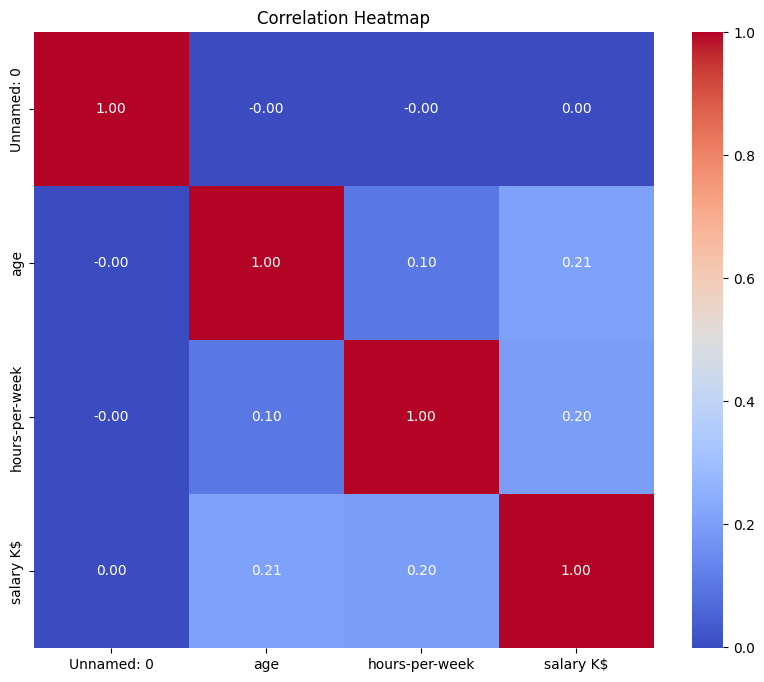

In [22]:
# write your code for task 9 here
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()